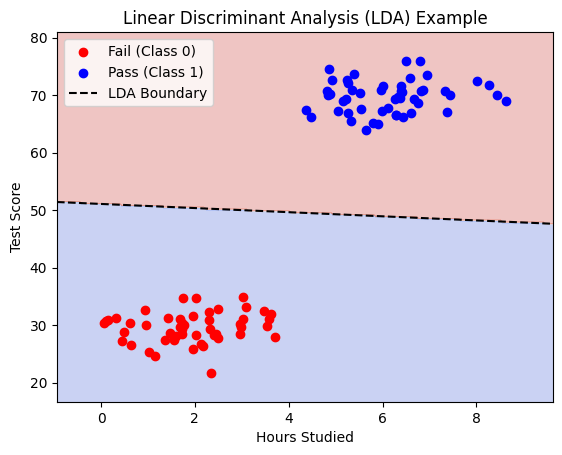

In [5]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 2: Create dataset (2 features for visualization)
np.random.seed(42)
# Class 0: Fail (lower scores, less hours)
X0 = np.random.multivariate_normal([2, 30], [[1, 0.5], [0.5, 10]], 50)
# Class 1: Pass (higher scores, more hours)
X1 = np.random.multivariate_normal([6, 70], [[1, 0.5], [0.5, 10]], 50)

X = np.vstack((X0, X1))  # features: Hours studied, Test Score
y = np.array([0]*50 + [1]*50)  # labels: 0=Fail, 1=Pass

# Step 3: Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Step 4: Predict on grid for decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-5, X[:,1].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X0[:,0], X0[:,1], color="red", label="Fail (Class 0)")
plt.scatter(X1[:,0], X1[:,1], color="blue", label="Pass (Class 1)")

# Plot LDA decision boundary line
coef = lda.coef_[0]
intercept = lda.intercept_[0]
x_vals = np.linspace(x_min, x_max, 100)
y_vals = -(coef[0]/coef[1])*x_vals - intercept/coef[1]
plt.plot(x_vals, y_vals, color="black", linestyle="--", label="LDA Boundary")

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Linear Discriminant Analysis (LDA) Example")
plt.legend()
plt.show()
